In [1]:
import numpy as np
import matplotlib.pyplot as plt
import defs
import appynho
import perfis

In [2]:
litho_types = defs.read_litho_types('../data/lito_code.csv')

In [3]:
# reading the files .LAS of all wells
# using the function "read_well" in the file "defs"
well_25 = defs.read_well('../data/7-MP-25-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_55 = defs.read_well('../data/7-MP-55D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'Lith_new'])

In [4]:
well_25['LITHOLOGY'] = well_25['Lith_new']
well_55['LITHOLOGY'] = well_55['Lith_new']

In [5]:
#setting top and base of the Maracangalha formation
top = 2500.00
base = 3100.00
step = 3
overlap = 0.00

In [6]:
# cutting all curves of all wells, selecting the top-base range
# using the function "formation_zone" in the file "defs"
formation_25 = defs.formation_zone(well_25, top, base)
formation_55 = defs.formation_zone(well_55, top, base)

In [7]:
#creating curves that only contains one lithology type, for each lithology
#using the function "separate_lithology" in the file "defs"
separate_25 = defs.separate_lithology(formation_25, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_55 = defs.separate_lithology(formation_55, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])

In [8]:
statistic_25 = defs.statistic_lithology(separate_25, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)

C:\Users\rmota\Documents\PFG_2020\codes\defs.py:393: RuntimeWarning: Mean of empty slice
  m = np.nanmean(curve_save[w])
c:\users\rmota\.conda\envs\tcc3\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [9]:
gr_sort = defs.sort_curve(separate_55, statistic_25, litho_types, 'GR', step, top, base)
nphi_sort = defs.sort_curve(separate_55, statistic_25, litho_types, 'NPHI', step, top, base)
rhob_sort = defs.sort_curve(separate_55, statistic_25, litho_types, 'RHOB', step, top, base)

In [10]:
plt.rcParams.update({'font.size': 12})

In [11]:
cores = {}
for lith in litho_types:
    cores[int(litho_types[lith]['CODE'])] = [litho_types[lith]['COLOR'],lith]

In [12]:
cores[25][0] = '#a9a9a9'

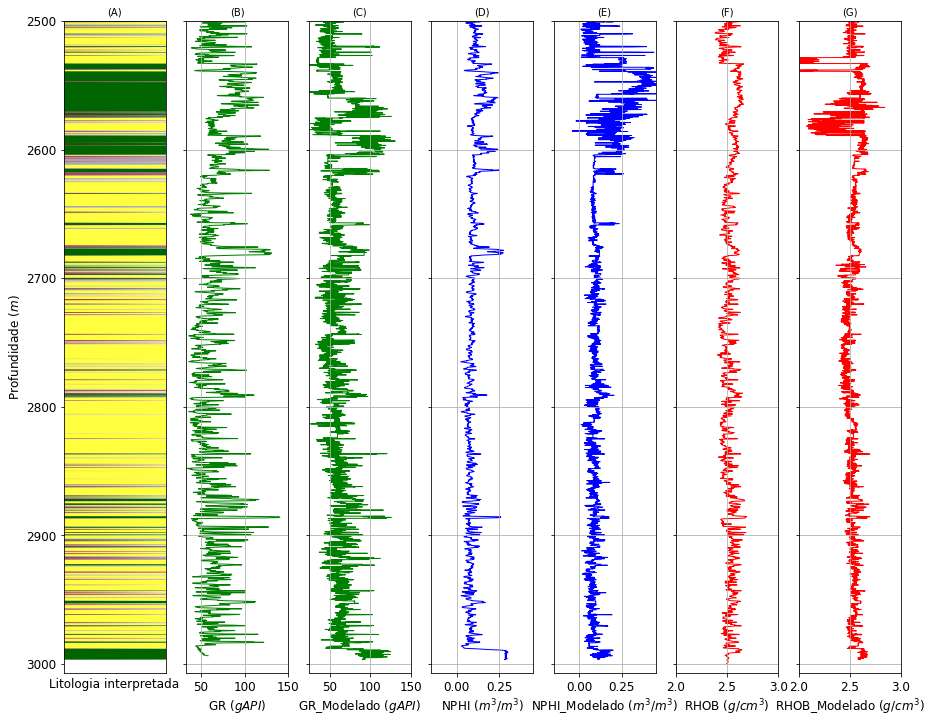

In [13]:
layout_100_singular = {
    'comprimento':15,
    'altura':12,
    'linha_estilo' : '-',
    'titulo_fonte':10,
    'resolucao':72,
    'titulo_geral':'',
    'descricao_x':'',
    'descricao_y':'Profundidade $(m)$',
    'descricao_fonte': 12
}

grafico = perfis.plotagem(7, layout_100_singular)

grafico.plot_l(0, separate_55['LITHOLOGY'], separate_55['DEPTH'], relacao_cor=cores, padrao_local={'descricao_x':'Litologia interpretada', 'titulo':'(A)'})

grafico.plot_s(1, separate_55['GR'], separate_55['DEPTH'],{'cor':'g', 'descricao_x':'GR $(gAPI)$', 'titulo':'(B)', 'minimo_x': 0, 'maximo_x': 150, 'ordem_z':-1})
grafico.plot_s(2, gr_sort, separate_55['DEPTH'],{'cor':'g', 'descricao_x':'GR_Modelado $(gAPI)$', 'titulo':'(C)', 'minimo_x': 0, 'maximo_x': 150, 'ordem_z':-1})


grafico.plot_s(3, separate_55['NPHI'], separate_55['DEPTH'],{'cor':'b', 'descricao_x':'NPHI $(m^3/m^3)$', 'titulo':'(D)', 'minimo_x': -0.15, 'maximo_x': 0.45, 'ordem_z':-1})
grafico.plot_s(4, nphi_sort, separate_55['DEPTH'],{'cor':'b', 'descricao_x':'NPHI_Modelado $(m^3/m^3)$', 'titulo':'(E)', 'minimo_x': -0.15, 'maximo_x': 0.45, 'ordem_z':-1})

grafico.plot_s(5, separate_55['RHOB'], separate_55['DEPTH'],{'cor':'r', 'descricao_x':'RHOB $(g/cm^3)$', 'titulo':'(F)', 'minimo_x': 2.0, 'maximo_x': 3.0})
grafico.plot_s(6, rhob_sort, separate_55['DEPTH'],{'cor':'r', 'descricao_x':'RHOB_Modelado $(g/cm^3)$', 'titulo':'(G)', 'minimo_x': 2.0, 'maximo_x': 3.0})

grafico.salvar("../image/resultado_singular_" + str(step) +".png")

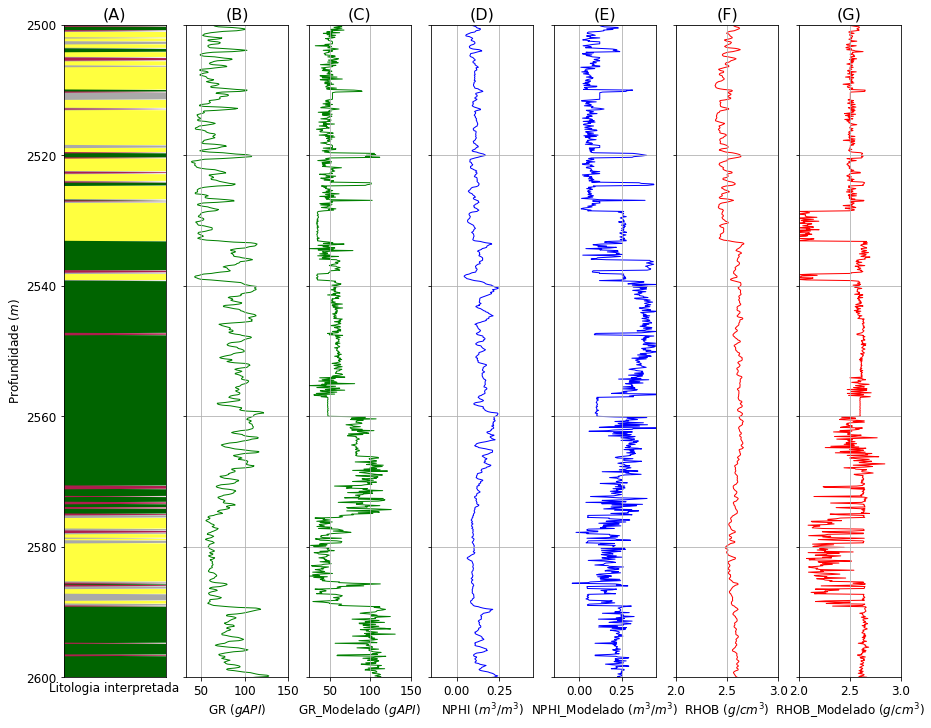

In [14]:
layout_100_singular = {
    'comprimento':15,
    'altura':12,
    'linha_estilo' : '-',
    'titulo_fonte':16,
    'resolucao':72,
    'titulo_geral':'',
    'descricao_x':'',
    'descricao_y':'Profundidade $(m)$',
    'descricao_fonte': 12,
    'minimo_y': 2500,
    'maximo_y': 2600
}

grafico = perfis.plotagem(7, layout_100_singular)

grafico.plot_l(0, separate_55['LITHOLOGY'], separate_55['DEPTH'], relacao_cor=cores, padrao_local={'descricao_x':'Litologia interpretada', 'titulo':'(A)'})

grafico.plot_s(1, separate_55['GR'], separate_55['DEPTH'],{'cor':'g', 'descricao_x':'GR $(gAPI)$', 'titulo':'(B)', 'minimo_x': 0, 'maximo_x': 150, 'ordem_z':-1})
grafico.plot_s(2, gr_sort, separate_55['DEPTH'],{'cor':'g', 'descricao_x':'GR_Modelado $(gAPI)$', 'titulo':'(C)', 'minimo_x': 0, 'maximo_x': 150, 'ordem_z':-1})

grafico.plot_s(3, separate_55['NPHI'], separate_55['DEPTH'],{'cor':'b', 'descricao_x':'NPHI $(m^3/m^3)$', 'titulo':'(D)', 'minimo_x': -0.15, 'maximo_x': 0.45, 'ordem_z':-1})
grafico.plot_s(4, nphi_sort, separate_55['DEPTH'],{'cor':'b', 'descricao_x':'NPHI_Modelado $(m^3/m^3)$', 'titulo':'(E)', 'minimo_x': -0.15, 'maximo_x': 0.45, 'ordem_z':-1})

grafico.plot_s(5, separate_55['RHOB'], separate_55['DEPTH'],{'cor':'r', 'descricao_x':'RHOB $(g/cm^3)$', 'titulo':'(F)', 'minimo_x': 2.0, 'maximo_x': 3.0})
grafico.plot_s(6, rhob_sort, separate_55['DEPTH'],{'cor':'r', 'descricao_x':'RHOB_Modelado $(g/cm^3)$', 'titulo':'(G)', 'minimo_x': 2.0, 'maximo_x': 3.0})

grafico.salvar("../image/resultado_singular_" + str(step) +"_2500_2600.png")

In [15]:
x1 = np.linspace(min(separate_55['GR']), max(separate_55['GR']), len(separate_55['GR']))
x2 = np.linspace(min(separate_55['NPHI']), max(separate_55['NPHI']), len(separate_55['NPHI']))
x3 = np.linspace(min(separate_55['RHOB']), max(separate_55['RHOB']), len(separate_55['RHOB']))

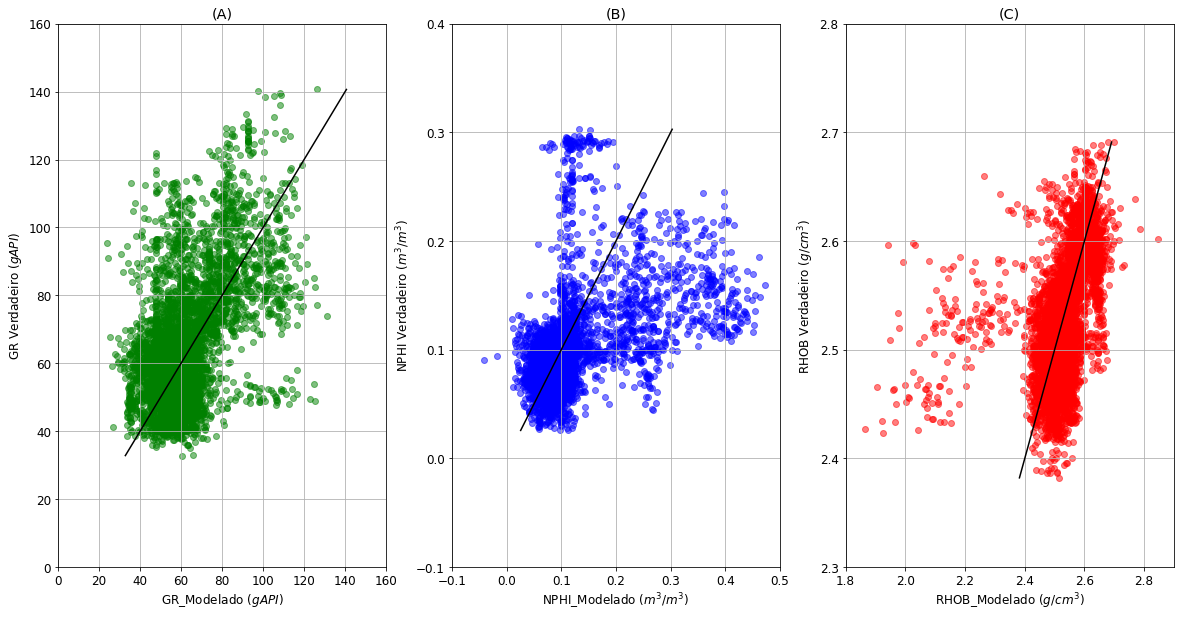

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.plot(x1, x1, color='black')
plt.scatter(gr_sort, separate_55['GR'], color= 'green', alpha=0.5)
plt.xlabel('GR_Modelado ($gAPI$)')
plt.ylabel('GR Verdadeiro ($gAPI$)')
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.title('(A)')
plt.grid()
plt.subplot(132)
plt.plot(x2, x2, color='black')
plt.scatter(nphi_sort, separate_55['NPHI'], color= 'blue', alpha=0.5)
plt.xlabel('NPHI_Modelado ($m^3/m^3$)')
plt.ylabel('NPHI Verdadeiro ($m^3/m^3$)')
plt.xlim(-0.1, 0.5)
plt.ylim(-0.1, 0.4)
plt.title('(B)')
plt.grid()
plt.subplot(133)
plt.plot(x3, x3, color='black')
plt.scatter(rhob_sort, separate_55['RHOB'], color= 'red', alpha=0.5)
plt.xlabel('RHOB_Modelado ($g/cm^3$)')
plt.ylabel('RHOB Verdadeiro ($g/cm^3$)')
plt.xlim(1.8, 2.9)
plt.ylim(2.3, 2.8)
plt.title('(C)')
plt.grid()
plt.savefig('../image/scatterplots_singular_3.pdf', dpi=300, transparent=True, bbox_inches = 'tight')
plt.show()

In [ ]:
import perfis

In [ ]:
def nova_estrutura_de_Dados(dicionario_statistica, lista_dados, cores_informativo):
    
    statistic_data = {}
    for j in lista_dados:
        statistic_data[j] = {}
        dado = {}
        for i in cores_informativo:
            a = dicionario_statistica[ cores_informativo[i][1] ][j]
            l_prof = (np.array(a['Mean']['Top']) + np.array(a['Mean']['Base']))/2.0
            l_mean = a['Mean']['Value']
            l_std = a['Std']['Value']
            dado[i] = [l_prof, l_mean, l_std]
            statistic_data[j][i] = dado[i]
            
    return statistic_data

# -------------------------------------------------------- #

In [ ]:
dados = ['GR','NPHI','RHOB', 'DT']

database_reestruturado = nova_estrutura_de_Dados(statistic_25, dados, cores)

In [ ]:
usuario_layout_stats_55D = {
    'comprimento':15,
    'altura':10,
    'linha_estilo' : '-',
    'titulo_fonte':16,
    'resolucao':72,
    'titulo_geral':'',
    'descricao_x':'',
    'descricao_y':'Profundidade $(m)$',
}

grafico = perfis.plotagem(4, usuario_layout_stats_55D)

grafico.plot_stats(0,database_reestruturado['GR'],49,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_stats(0,database_reestruturado['GR'],54,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_stats(0,database_reestruturado['GR'],25,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_stats(0,database_reestruturado['GR'],57,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_s(0, gr_sort, separate_55['DEPTH'],{'cor':'g', 'descricao_x':'GR_Modelado $(gAPI)$', 'titulo':'','ordem_z':-1})

grafico.plot_stats(1,database_reestruturado['NPHI'],49,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(1,database_reestruturado['NPHI'],54,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(1,database_reestruturado['NPHI'],25,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(1,database_reestruturado['NPHI'],57,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_s(1, nphi_sort, separate_55['DEPTH'],{'cor':'b', 'descricao_x':'NPHI_Modelado $(-)$', 'titulo':'','ordem_z':-1})

grafico.plot_stats(2,database_reestruturado['RHOB'],49,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(2,database_reestruturado['RHOB'],54,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(2,database_reestruturado['RHOB'],25,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(2,database_reestruturado['RHOB'],57,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_s(2, rhob_sort, separate_55['DEPTH'],{'cor':'r', 'descricao_x':'RHOB_Modelado $(g/cm^3)$', 'titulo':''})

grafico.plot_l(3, separate_55['LITHOLOGY'], separate_55['DEPTH'], cores, {'titulo':'7-MP-55D-BA','curva_limite':separate_55['LITHOLOGY'],'linha_espessura':0.1})